# Two Way ANOVA

In [1]:
# IMPORT LIBRARIES
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# creat a dataset

df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'medium', 'high'], 5), 2),
                   'height': [6,6,6,5,6,5,5,6,4,5,
                              6,6,7,8,7,3,4,4,4,5,
                              4,4,4,4,4,5,6,6,7,8]})
df.sample(10)                              


water     sun  height
27  weekly    high       6
0    daily     low       6
5    daily  medium       5
21  weekly  medium       4
10   daily    high       6
8    daily  medium       4
1    daily     low       6
17  weekly     low       4
11   daily    high       6
3    daily     low       5

C:\Users\Quantum\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

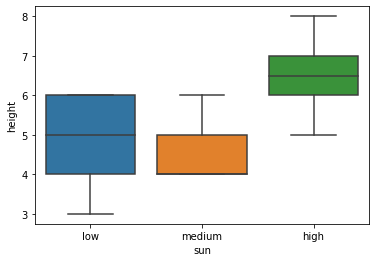

In [3]:
sns.boxplot(df['sun'], df['height'])

C:\Users\Quantum\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

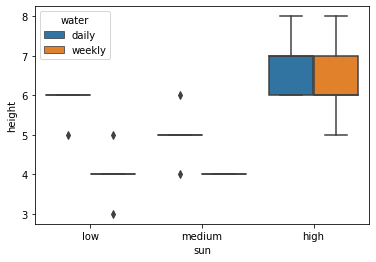

In [4]:
sns.boxplot(df['sun'], df['height'], hue=df['water'])

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#ANOVA
model = ols('height ~ sun', data=df).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq    df          F    PR(>F)
sun       24.866667   2.0  14.105042  0.000064
Residual  23.800000  27.0        NaN       NaN

In [6]:
#TWO_WAY_ANOVA
model = ols('height ~ C(sun) + C(water) + C(sun):C(water)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq    df        F    PR(>F)
C(sun)           24.866667   2.0  23.3125  0.000002
C(water)          8.533333   1.0  16.0000  0.000527
C(sun):C(water)   2.466667   2.0   2.3125  0.120667
Residual         12.800000  24.0      NaN       NaN

In [8]:
#Another way of doing this (Two way Anova)
import pingouin as pg
aov = pg.anova(data=df, dv = 'height', between=['sun','water'], detailed=True)
print(aov)

ModuleNotFoundError: No module named 'pingouin'

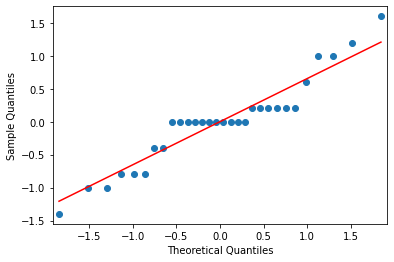

In [9]:
#qq Norm Plot
res = model.resid
fig = sm.qqplot(res, line='s')
plt.show()